In [40]:
import awkward as ak 
import numpy as np 
import uproot
import matplotlib.pyplot as plt
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
NanoAODSchema.warn_missing_crossrefs = False
import mplhep as hep
hep.style.use("CMS")

In [3]:
fname ='root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/ForHiggsTo4Leptons/Run2012B_DoubleElectron.root'

In [117]:
def duoElectronSelect(DATA,PT,ETA):
    '''Event selection: electron antielectron pair, electron.pt > PT.'''
    x = DATA.Electron[ak.num(DATA.Electron) == 2]
    x = x[x.charge[:,0] != x.charge[:,1]]
    x = x[(x.pt[:,:] > PT)]
    x = x[ak.num(x) == 2]
    return x

def tetraElectronSelect(DATA,PT,ETA):
    '''Event selection: 2 electron antielectron pairs, electron.pt > PT.'''
    x = DATA.Electron[ak.num(DATA.Electron) == 4]
    x = x[x.charge[:,0] + x.charge[:,1] + x.charge[:,2] + x.charge[:,3] == 0]
    x = x[(x.pt[:,:] > PT)]
    x = x[ak.num(x) == 2]
    return x

In [5]:
events = NanoEventsFactory.from_root(fname, schemaclass = NanoAODSchema.v6).events()

In [6]:
twoleptons = duoElectronSelect(events, 20,0)
fourleptons = tetraElectronSelect(events, 20, 0)

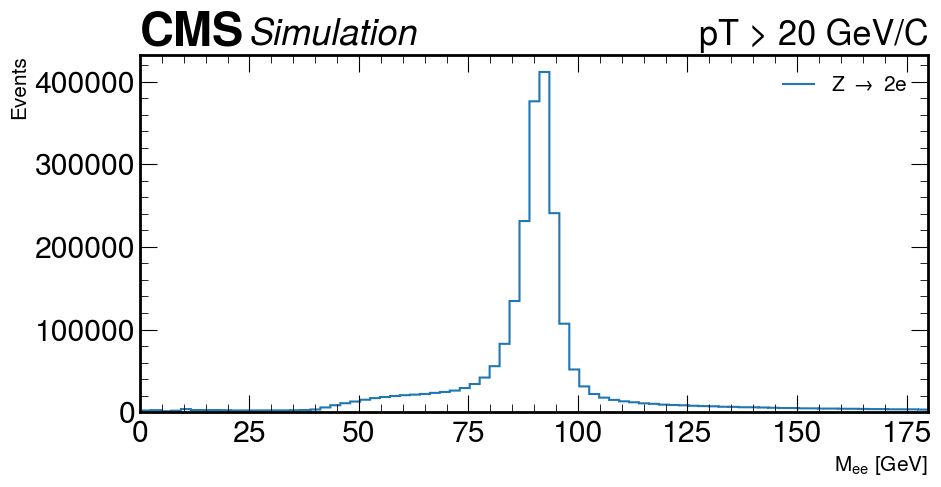

In [122]:
h1,bins  = np.histogram((twoleptons[:,0] + twoleptons[:,1]).mass,bins = 1000)
f,ax = plt.subplots(figsize=(10, 5))
# ax.set_title('pT > 20 GeV/C', fontsize=18)
hep.histplot(h1, bins, label=r'Z $\rightarrow$ 2e')
ax.set_xlim(0, 180)
ax.set_ylabel('Events', fontsize=15)
ax.set_xlabel('$M_{ee}$ [GeV]', fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
hep.cms.label(rlabel='pT > 20 GeV/C')
plt.show()

Need to reconstruct zz to 4e

In [90]:
# h2,bins  = np.histogram((fourleptons[:,0] + fourleptons[:,1]).mass,bins = 1000)
# f,ax = plt.subplots(figsize=(8,4))
# ax.set_title('pT > 20 GeV/C', fontsize=18)
# hep.histplot(h2, bins, label='ZZ->eeee')
# ax.set_xlim(0, 150)
# ax.set_ylabel('Events')
# ax.set_xlabel('[GeV]')
# plt.legend()
# plt.show()